<a href="https://colab.research.google.com/github/angelesGladin/TelecomX_latam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X - Análisis de Evasión de Clientes**

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El ánalisis contiene:

*   Importación y manipulación de datos desde una API.
*   Aplicación de los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
*   Creación de visualizaciones estratégicas para identificar patrones y tendencias.
*   Análisis Exploratorio de Datos (EDA) e informe con insights relevantes.





##📌 **Extracción**

In [1]:
import pandas as pd
import requests
import json
import numpy as np

In [2]:
#accediedo a la API
df = requests.get('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

#recuperando los resultados
resultado = json.loads(df.text)

##obteniendo vista previa del df
df = pd.DataFrame(resultado)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##🔧 **Transformación**

###**Normalización de las columnas anidadas**

In [3]:
id_churn = df[['customerID', 'Churn']]
id_churn

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


In [4]:
customer = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account = pd.json_normalize(df['account'])

#concatenando para crear el df base

telecom_df = pd.concat([id_churn, customer, phone, internet, account], axis=1)
telecom_df.sample(4)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1080,1527-SXDPN,Yes,Male,0,Yes,Yes,52,Yes,Yes,Fiber optic,...,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),96.25,4990.25
4259,5855-EIBDE,No,Female,0,Yes,No,49,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),106.65,5174.35
5633,7693-LCKZL,Yes,Male,0,Yes,Yes,5,Yes,Yes,Fiber optic,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,80.15,385
4712,6461-SZMCV,No,Female,0,Yes,No,71,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),87.95,6365.35


###**Explorar las columnas y tipos de datos**

In [5]:
#renombrando columnas
telecom_df.rename(columns={
    'customerID': 'id_cliente',
    'gender': 'genero',
    'SeniorCitizen': 'es_ciudadano_senior',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependientes',
    'tenure': 'meses_en_empresa',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales',
    'Churn': 'abandono'
}, inplace=True)

telecom_df.head()

,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
telecom_df.columns

Index(['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales'],
      dtype='object')

In [7]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   es_ciudadano_senior     7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_dependientes      7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   tipo_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [8]:
#verificación que no existan datos null
telecom_df.isnull().sum()

,0
id_cliente,0
abandono,0
genero,0
es_ciudadano_senior,0
tiene_pareja,0
tiene_dependientes,0
meses_en_empresa,0
servicio_telefonico,0
lineas_multiples,0
tipo_internet,0


In [9]:
#verificación de valores duplicados
print(telecom_df.duplicated().sum())

0


In [10]:
#verificando errores de formato
for col in ['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales']:
    print(f"Valores únicos para la columna '{col}':")
    print(telecom_df[col].unique())
    print("-" * 20)

Valores únicos para la columna 'id_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------
Valores únicos para la columna 'abandono':
['No' 'Yes' '']
--------------------
Valores únicos para la columna 'genero':
['Female' 'Male']
--------------------
Valores únicos para la columna 'es_ciudadano_senior':
[0 1]
--------------------
Valores únicos para la columna 'tiene_pareja':
['Yes' 'No']
--------------------
Valores únicos para la columna 'tiene_dependientes':
['Yes' 'No']
--------------------
Valores únicos para la columna 'meses_en_empresa':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores únicos para la columna 'servicio_telefonico':
['Yes' 'No']
--------------------
Valores únicos para la columna 'lineas_multiples':
['No'

###**Limpieza de los datos en texto**

In [11]:
#limpueza columna id del cliente
telecom_df['id_cliente'] = telecom_df['id_cliente'].str.strip()
telecom_df['id_cliente'].sample(4)

,id_cliente
4540,6223-DHJGV
605,0866-QLSIR
2738,3791-LGQCY
3393,4704-ERYFC


In [12]:
#limpieza de la columna tipo_contrato
telecom_df['tipo_contrato'] = telecom_df['tipo_contrato'].str.lower()
telecom_df['tipo_contrato'] = telecom_df['tipo_contrato'].str.replace(r'\-', ' ', regex=True).str.strip()

In [13]:
telecom_df['tipo_contrato'].sample(4)

,tipo_contrato
6886,month to month
1430,one year
5599,two year
3305,month to month


In [14]:
#liempaza de la columna metodo_pago
telecom_df['metodo_pago'] = telecom_df['metodo_pago'].str.lower()
telecom_df['metodo_pago'] = telecom_df['metodo_pago'].str.replace(r'\(|\)', '', regex=True).str.strip()

In [15]:
telecom_df['metodo_pago'].sample(4)

,metodo_pago
3460,bank transfer automatic
4966,electronic check
4698,credit card automatic
7266,electronic check


###**Limpieza de los datos númericos**

In [16]:
#Eliminando los espacios del la columna cargos totales
telecom_df['cargos_totales'] = telecom_df['cargos_totales'].replace(' ', np.nan)
#convirtiendo el tipo de dato
telecom_df['cargos_totales'] = pd.to_numeric(telecom_df['cargos_totales'], errors='coerce')
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   es_ciudadano_senior     7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_dependientes      7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   tipo_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [17]:
telecom_df['cargos_totales'].isna().sum()

np.int64(11)

In [18]:
# Eliminar registros con cargos_totales faltantes
telecom_df = telecom_df.dropna(subset=['cargos_totales'])

# Verificación rápida
print(f"Número de registros después de limpieza: {len(telecom_df)}")

Número de registros después de limpieza: 7256


In [19]:
## Transformar columnas binarias en 'Yes' en 1 y 'No' en 0: la finalidad poder analizar estas columnas

col_binario = ['abandono','tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'factura_electronica']

telecom_df[col_binario] = telecom_df[col_binario].replace({'Yes':1, 'No':0, '':np.nan})
telecom_df[col_binario] = telecom_df[col_binario].fillna(0)
telecom_df[col_binario] = telecom_df[col_binario].astype(int)
telecom_df[col_binario].sample(4)

<ipython-input-19-7476ddb1101e>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_df[col_binario] = telecom_df[col_binario].replace({'Yes':1, 'No':0, '':np.nan})


,abandono,tiene_pareja,tiene_dependientes,servicio_telefonico,factura_electronica
2564,0,0,0,1,0
4912,1,0,0,1,1
1845,1,1,1,1,1
4811,0,0,1,1,0


###**Análisis Profundo**

In [20]:
#creando la columna cuentas_diarias
telecom_df['cuentas_diarias'] = telecom_df['cargos_mensuales']/30
telecom_df[['cargos_mensuales', 'cuentas_diarias']].sample(4)

,cargos_mensuales,cuentas_diarias
177,50.55,1.685000
5788,75.10,2.503333
4321,94.20,3.140000
212,48.55,1.618333


In [21]:
#análisis descriptivo
telecom_df.describe()

,abandono,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


##📊 **Carga y análisis**

###**Distrubución de evasión**

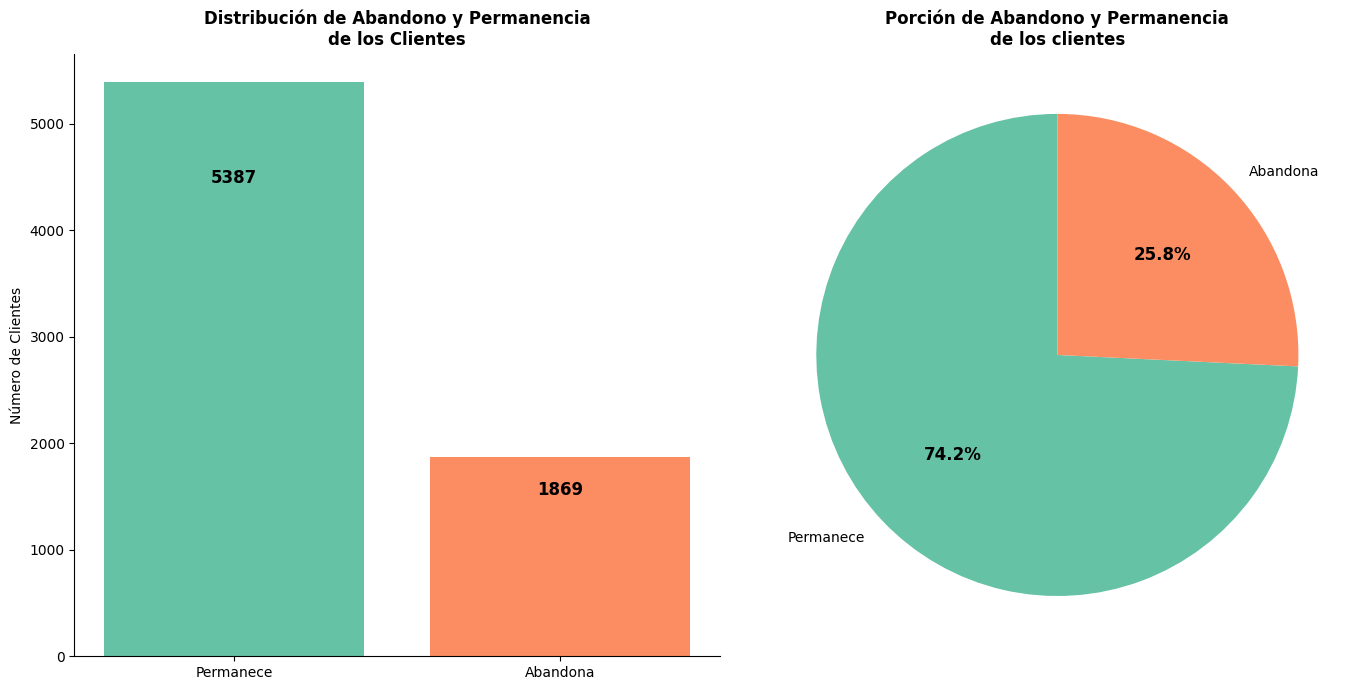

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

abandono_counts = telecom_df["abandono"].value_counts().sort_index()
abandono_props = telecom_df["abandono"].value_counts(normalize=True).sort_index()
labels = ["Permanecen", "Abandonan"]
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
colors = sns.color_palette("Set2")

# Gráfico de barras
bars = axs[0].bar(
    abandono_counts.index.map({0: 'Permanece', 1: 'Abandona'}),
    abandono_counts.values,
    color=colors
)

for ax in axs.flat:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

axs[0].set_title('Distribución de Abandono y Permanencia\nde los Clientes', fontsize=12, weight='bold', loc='center')
axs[0].set_ylabel('Número de Clientes')

# Texto dentro de las barras
for bar in bars:
    height = bar.get_height()
    axs[0].text(
        bar.get_x() + bar.get_width() / 2,
        height /1.2,
        f'{height:.0f}',
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold',
        color='black')

axs[0].grid(False)

#gráfico de pastel
def custom_autopct(pct):
    return f'{pct:.1f}%'

wedges, texts, autotexts = axs[1].pie(
    abandono_counts.values,
    labels=abandono_counts.index.map({0: 'Permanece', 1: 'Abandona'}),
    autopct=custom_autopct,
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10})


for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

axs[1].set_title('Porción de Abandono y Permanencia\nde los clientes', fontsize=12, weight='bold', loc='center')

plt.tight_layout()
plt.show()

###**Recuento de evasión por variables categóricas**

In [23]:
# Función auxiliar para ver distribución de abandono por cada categoría
def analizar_evasion_por_categoria(df, columna):
    cruzado = pd.crosstab(df[columna], df['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']
    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

# Variables categóricas a analizar
categoricas = ['genero', 'tipo_contrato', 'metodo_pago', 'tipo_internet']

# Aplicar análisis
resultados = {}
for cat in categoricas:
    resultados[cat] = analizar_evasion_por_categoria(telecom_df, cat)


Análisis para: genero
        % No Abandono  % Abandono
genero                           
Female      73.822135   26.177865
Male        74.652494   25.347506

Análisis para: tipo_contrato
                % No Abandono  % Abandono
tipo_contrato                            
month to month      58.676654   41.323346
one year            89.064559   10.935441
two year            97.230237    2.769763

Análisis para: metodo_pago
                         % No Abandono  % Abandono
metodo_pago                                       
bank transfer automatic      83.742911   16.257089
credit card automatic        85.194639   14.805361
electronic check             56.196319   43.803681
mailed check                 81.412191   18.587809

Análisis para: tipo_internet
               % No Abandono  % Abandono
tipo_internet                           
DSL                81.514297   18.485703
Fiber optic        59.443402   40.556598
No                 92.825397    7.174603


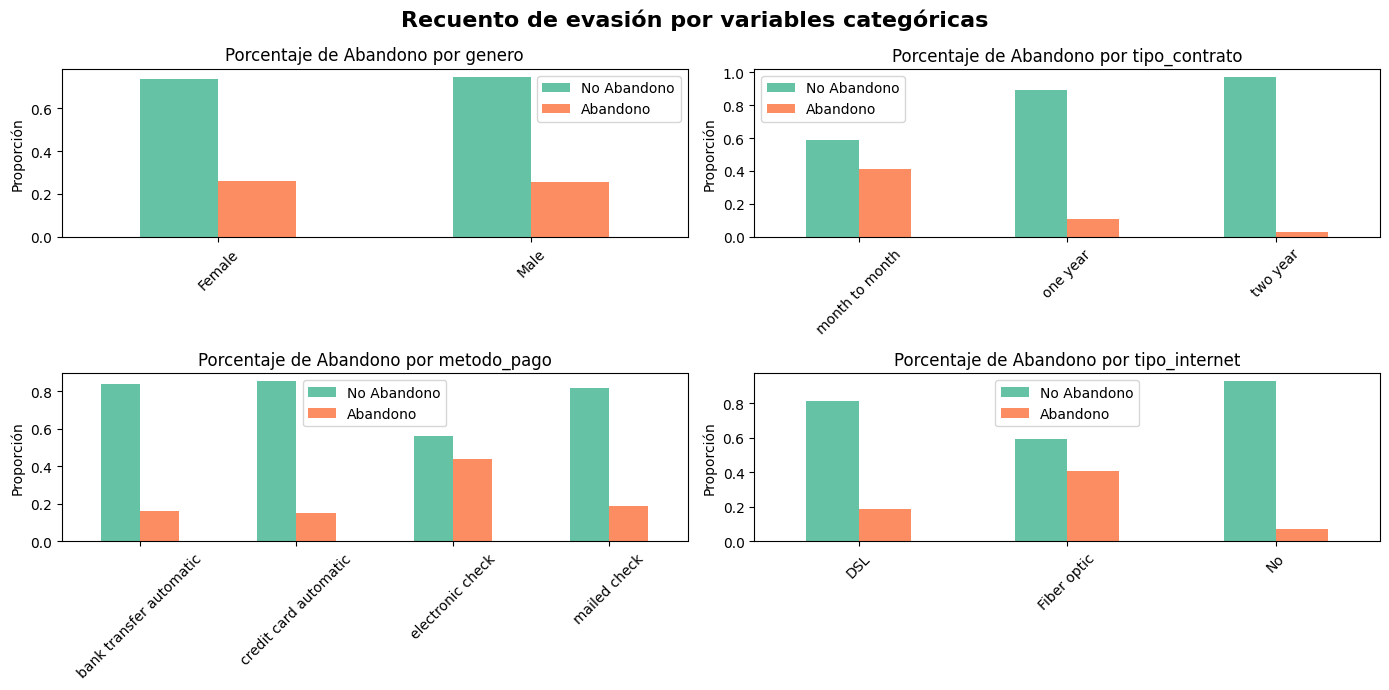

In [38]:
# Configuración de subplots: 2 columnas por fila
fig, axes = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=2, figsize=(14, 7))
axes = axes.flatten()  # Aplanar matriz de ejes para indexarlos fácilmente
colors = sns.color_palette("Set2")

# Crear cada gráfico en su subplot
for i, cat in enumerate(categoricas):
    cruzado = pd.crosstab(telecom_df[cat], telecom_df['abandono'], normalize='index')
    cruzado.plot(kind='bar', ax=axes[i], color=colors)

    axes[i].set_title(f'Porcentaje de Abandono por {cat}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proporción')
    axes[i].legend(['No Abandono', 'Abandono'])
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Recuento de evasión por variables categóricas', fontsize=16, weight='bold', ha='center')

plt.tight_layout()
plt.show()

###**Análisis de evasión en columnas binarias**

In [29]:
binarias = ['es_ciudadano_senior', 'tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'factura_electronica']
def analizar_evasion_binarias(df, columna):
    # Mapeo opcional para mejor legibilidad (0 = No, 1 = Sí)
    df_temp = df.copy()
    df_temp[columna] = df_temp[columna].map({1: 'Sí', 0: 'No'})

    cruzado = pd.crosstab(df_temp[columna], df_temp['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']

    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

# Resultados por columna binaria
resultados_binarios = {}
for col in binarias:
    resultados_binarios[col] = analizar_evasion_binarias(telecom_df, col)


Análisis para: es_ciudadano_senior
                     % No Abandono  % Abandono
es_ciudadano_senior                           
No                       77.066184   22.933816
Sí                       59.729272   40.270728

Análisis para: tiene_pareja
              % No Abandono  % Abandono
tiene_pareja                           
No                67.974380   32.025620
Sí                80.934739   19.065261

Análisis para: tiene_dependientes
                    % No Abandono  % Abandono
tiene_dependientes                           
No                      69.661817   30.338183
Sí                      84.976959   15.023041

Análisis para: servicio_telefonico
                     % No Abandono  % Abandono
servicio_telefonico                           
No                       75.886525   24.113475
Sí                       74.065028   25.934972

Análisis para: factura_electronica
                     % No Abandono  % Abandono
factura_electronica                           
No            

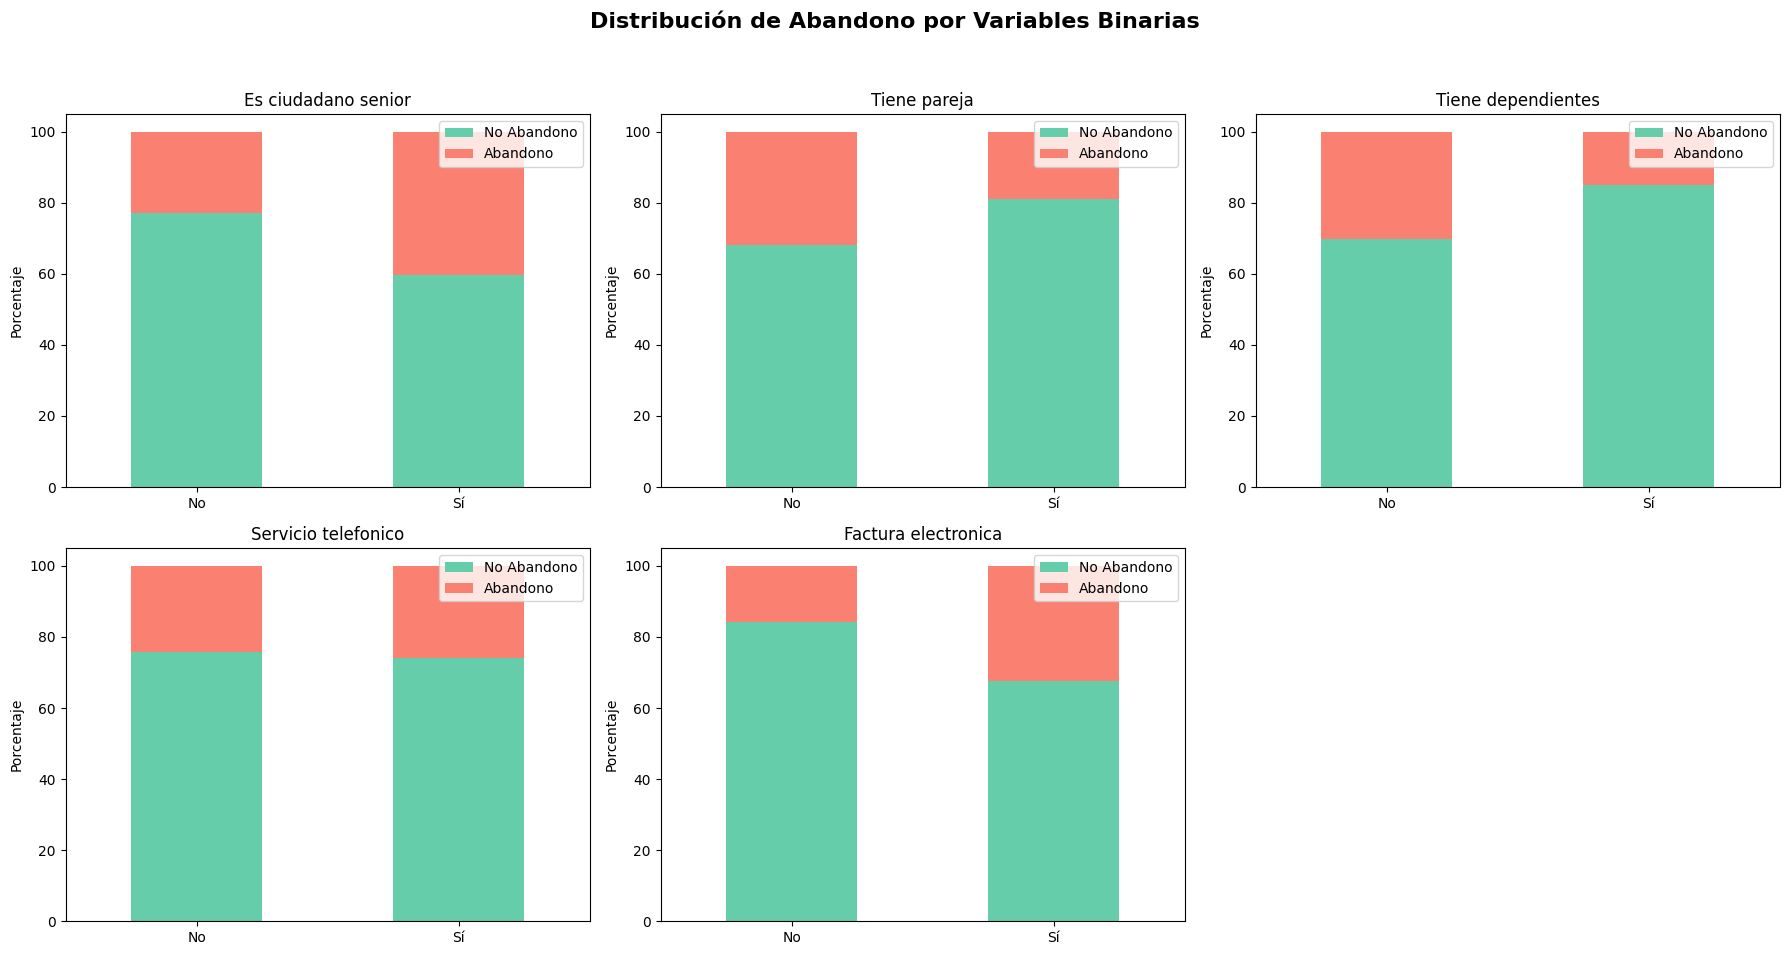

In [37]:
# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(binarias):
    df_temp = telecom_df.copy()
    df_temp[col] = df_temp[col].map({1: 'Sí', 0: 'No'})

    cruzado = pd.crosstab(df_temp[col], df_temp['abandono'], normalize='index') * 100
    cruzado.columns = ['No Abandono', 'Abandono']

    cruzado.plot(kind='bar', stacked=True, color=['mediumaquamarine', 'salmon'], ax=axes[idx])
    axes[idx].set_title(f'{col.replace("_", " ").capitalize()}')
    axes[idx].set_ylabel('Porcentaje')
    axes[idx].set_xlabel('')
    axes[idx].legend(loc='best')
    axes[idx].tick_params(axis='x', rotation=0)

# Eliminar subplot vacío
if len(binarias) < len(axes):
    for j in range(len(binarias), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Distribución de Abandono por Variables Binarias', fontsize=16, weight='bold', ha='center')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [55]:
numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
def analizar_evasion_numericas(df, columnas, bins=4):

    resultados = {}

    for col in columnas:
        # Crear intervalos (bins)
        df[f'{col}_bin'] = pd.qcut(df[col], q=bins, duplicates='drop')

        # Tabla cruzada
        cruzado = pd.crosstab(df[f'{col}_bin'], df['abandono'], normalize='index') * 100
        cruzado.columns = ['% No Abandono', '% Abandono']

        print(f'\nAnálisis por rangos para: {col}')
        print(cruzado)

        resultados[col] = cruzado

    return resultados


resultados_numericas = analizar_evasion_numericas(telecom_df, numericas, bins=5)


Análisis por rangos para: meses_en_empresa
                      % No Abandono  % Abandono
meses_en_empresa_bin                           
(0.999, 6.0]              48.590164   51.409836
(6.0, 20.0]               67.456446   32.543554
(20.0, 40.0]              78.305785   21.694215
(40.0, 60.0]              84.924623   15.075377
(60.0, 72.0]              93.590627    6.409373

Análisis por rangos para: cargos_mensuales
                      % No Abandono  % Abandono
cargos_mensuales_bin                           
(18.249, 25.05]           91.114149    8.885851
(25.05, 58.7]             75.763889   24.236111
(58.7, 79.1]              71.114168   28.885832
(79.1, 94.3]              64.872326   35.127674
(94.3, 118.75]            68.206897   31.793103

Análisis por rangos para: cargos_totales
                    % No Abandono  % Abandono
cargos_totales_bin                           
(18.799, 266.6]         55.509642   44.490358
(266.6, 939.7]          72.019297   27.980703
(939.7, 2033.8

In [58]:
import plotly.express as px

def graficar_barras_abandono_interactivo(df, columnas, bins=10):
    datos_plot = []

    for col in columnas:
        # Crear bins para la columna numérica
        df[f'{col}_bin'] = pd.qcut(df[col], q=bins, duplicates='drop').astype(str)

        # Calcular % abandono por bin
        resumen = df.groupby(f'{col}_bin')['abandono'].mean().reset_index()
        resumen['abandono'] = resumen['abandono'] * 100
        resumen['variable'] = col

        resumen = resumen.rename(columns={f'{col}_bin': 'rango', 'abandono': 'porcentaje_abandono'})
        datos_plot.append(resumen)

    datos_todos = pd.concat(datos_plot)

    # Gráfico de barras agrupadas con plotly express
    fig = px.bar(
        datos_todos,
        x='rango',
        y='porcentaje_abandono',
        color='variable',
        barmode='group',
        title='Porcentaje de abandono según variables numéricas (binned)',
        labels={'rango': 'Rango de valor', 'porcentaje_abandono': '% de abandono', 'variable': 'Variable'}
    )

    fig.update_layout(
        width=900,
        height=500,
        xaxis_tickangle=-45,
        template='plotly_white',
        font=dict(family='Arial', size=14, color='black')
    )

    fig.show()

# Usa la función con tus columnas numéricas
numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
graficar_barras_abandono_interactivo(telecom_df, numericas)

##📄**Informe final**